In [88]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [89]:
Variables=symbols("x1 y1 x2 y2")
x1,y1,x2,y2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("alpha beta gamma delta w a0 a1 omega")
alpha,beta,gamma,delta,w,a0,a1,omega = Parameters

### Duffing system

In [90]:
F=Matrix([y1, gamma*cos(omega*t) - delta*y1 - beta*x1 - alpha*x1**3,
          y2, gamma*cos(omega*t) - delta*y2 - beta*x2 - alpha*x2**3])
F

⎡                y₁                ⎤
⎢                                  ⎥
⎢      3                           ⎥
⎢- α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(ω⋅t)⎥
⎢                                  ⎥
⎢                y₂                ⎥
⎢                                  ⎥
⎢      3                           ⎥
⎣- α⋅x₂  - β⋅x₂ - δ⋅y₂ + γ⋅cos(ω⋅t)⎦

In [91]:
zeta=Matrix([0,0,
             0,0])
#zeta=eps*zeta
zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Synchrony

In [92]:
phi=Matrix([(x2-x1*(a1*sin(w*t))),y2-y1*(a1*sin(w*t))])
phi

⎡-a₁⋅x₁⋅sin(t⋅w) + x₂⎤
⎢                    ⎥
⎣-a₁⋅y₁⋅sin(t⋅w) + y₂⎦

In [93]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-a₁⋅sin(t⋅w)       0        1  0⎤
⎢                                ⎥
⎣     0        -a₁⋅sin(t⋅w)  0  1⎦

In [94]:
on_manifold = [(x2,x1*(a1*sin(w*t))),(y2,y1*(a1*sin(w*t)))]

## Invariance

In [95]:
# NF=(N*(F+zeta)).subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
# simplify(NF)
NF=N*(F+zeta)
NF
#simplify(NF)

⎡                                -a₁⋅y₁⋅sin(t⋅w) + y₂                         
⎢                                                                             
⎢     ⎛      3                           ⎞                3                   
⎣- a₁⋅⎝- α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(ω⋅t)⎠⋅sin(t⋅w) - α⋅x₂  - β⋅x₂ - δ⋅y₂ + γ⋅

        ⎤
        ⎥
        ⎥
cos(ω⋅t)⎦

In [96]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅x₁⋅cos(t⋅w)⎤
⎢                 ⎥
⎣-a₁⋅w⋅y₁⋅cos(t⋅w)⎦

In [97]:
eqn=(NF+dPhi)#.subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
simplify(eqn)

⎡                               -a₁⋅w⋅x₁⋅cos(t⋅w) - a₁⋅y₁⋅sin(t⋅w) + y₂       
⎢                                                                             
⎢                       ⎛    3                           ⎞                3   
⎣-a₁⋅w⋅y₁⋅cos(t⋅w) + a₁⋅⎝α⋅x₁  + β⋅x₁ + δ⋅y₁ - γ⋅cos(ω⋅t)⎠⋅sin(t⋅w) - α⋅x₂  - 

                        ⎤
                        ⎥
                        ⎥
β⋅x₂ - δ⋅y₂ + γ⋅cos(ω⋅t)⎦

In [98]:
# This is working only because of the nature of the N matrix - be careful
zeta[2]=-(eqn)[0]
zeta[3]=-(eqn)[1]

simplify(zeta)

⎡                                                 0                           
⎢                                                                             
⎢                                                 0                           
⎢                                                                             
⎢                               a₁⋅w⋅x₁⋅cos(t⋅w) + a₁⋅y₁⋅sin(t⋅w) - y₂        
⎢                                                                             
⎢                      ⎛    3                           ⎞                3    
⎣a₁⋅w⋅y₁⋅cos(t⋅w) - a₁⋅⎝α⋅x₁  + β⋅x₁ + δ⋅y₁ - γ⋅cos(ω⋅t)⎠⋅sin(t⋅w) + α⋅x₂  + β

                       ⎤
                       ⎥
                       ⎥
                       ⎥
                       ⎥
                       ⎥
                       ⎥
⋅x₂ + δ⋅y₂ - γ⋅cos(ω⋅t)⎦

In [99]:
zeta=zeta.subs(on_manifold)
zeta

⎡                                                                     0       
⎢                                                                             
⎢                                                                     0       
⎢                                                                             
⎢                                                              a₁⋅w⋅x₁⋅cos(t⋅w
⎢                                                                             
⎢  3     3    3                                                               
⎣a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅x₁⋅sin(t⋅w) + a₁⋅δ⋅y₁⋅sin(t⋅w) + a₁⋅w⋅y₁⋅cos(t⋅w) 

                                                               ⎤
                                                               ⎥
                                                               ⎥
                                                               ⎥
)                                                              ⎥
                                          

In [100]:
NF=N*(F+zeta)#.subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡0⎤
⎢ ⎥
⎣0⎦

In [101]:
NZ=N*zeta
NZ

⎡                                                              a₁⋅w⋅x₁⋅cos(t⋅w
⎢                                                                             
⎢  3     3    3                                                               
⎣a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅x₁⋅sin(t⋅w) + a₁⋅δ⋅y₁⋅sin(t⋅w) + a₁⋅w⋅y₁⋅cos(t⋅w) 

)                                                              ⎤
                                                               ⎥
     ⎛      3                           ⎞                      ⎥
+ a₁⋅⎝- α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(ω⋅t)⎠⋅sin(t⋅w) - γ⋅cos(ω⋅t)⎦

## Stability

In [215]:
chi=Matrix([0,0,
            -(x2-x1*a1*sin(w*t))/(a1**2*sin(w*t)**2+1),-(y2-y1*a1*sin(w*t))/(a1**2*sin(w*t)**2+1)])

#chi=(epsilon1*sin(b*t)+epsilon2)*chi 
#chi=epsilon*chi
#epsilon=1
chi

⎡         0         ⎤
⎢                   ⎥
⎢         0         ⎥
⎢                   ⎥
⎢a₁⋅x₁⋅sin(t⋅w) - x₂⎥
⎢───────────────────⎥
⎢   2    2          ⎥
⎢ a₁ ⋅sin (t⋅w) + 1 ⎥
⎢                   ⎥
⎢a₁⋅y₁⋅sin(t⋅w) - y₂⎥
⎢───────────────────⎥
⎢   2    2          ⎥
⎣ a₁ ⋅sin (t⋅w) + 1 ⎦

In [216]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡                                 0                                         0 
⎢                                                                             
⎢                                 0                                         0 
⎢                                                                             
⎢                           a₁⋅w⋅cos(t⋅w)                                   0 
⎢                                                                             
⎢    3     2    3                           ⎛        2    ⎞                   
⎣3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅sin(t⋅w) + a₁⋅⎝- 3⋅α⋅x₁  - β⎠⋅sin(t⋅w)  a₁⋅w⋅cos

       0  0⎤
           ⎥
       0  0⎥
           ⎥
       0  0⎥
           ⎥
           ⎥
(t⋅w)  0  0⎦

In [217]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡        0                  0                  0                  0        ⎤
⎢                                                                          ⎥
⎢        0                  0                  0                  0        ⎥
⎢                                                                          ⎥
⎢   a₁⋅sin(t⋅w)                               -1                           ⎥
⎢─────────────────          0          ─────────────────          0        ⎥
⎢  2    2                                2    2                            ⎥
⎢a₁ ⋅sin (t⋅w) + 1                     a₁ ⋅sin (t⋅w) + 1                   ⎥
⎢                                                                          ⎥
⎢                      a₁⋅sin(t⋅w)                               -1        ⎥
⎢        0          ─────────────────          0          ─────────────────⎥
⎢                     2    2                                2    2         ⎥
⎣                   a₁ ⋅sin (t⋅w) + 1                     a₁ ⋅sin (t⋅w) + 1⎦

In [218]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡      0        1         0        0 ⎤
⎢                                    ⎥
⎢        2                           ⎥
⎢- 3⋅α⋅x₁  - β  -δ        0        0 ⎥
⎢                                    ⎥
⎢      0        0         0        1 ⎥
⎢                                    ⎥
⎢                           2        ⎥
⎣      0        0   - 3⋅α⋅x₂  - β  -δ⎦

In [219]:
(del_F+del_zeta+del_chi)

⎡                                 0                                           
⎢                                                                             
⎢                                   2                                         
⎢                           - 3⋅α⋅x₁  - β                                     
⎢                                                                             
⎢                                    a₁⋅sin(t⋅w)                              
⎢                 a₁⋅w⋅cos(t⋅w) + ─────────────────                           
⎢                                   2    2                                    
⎢                                 a₁ ⋅sin (t⋅w) + 1                           
⎢                                                                             
⎢    3     2    3                           ⎛        2    ⎞                   
⎢3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅sin(t⋅w) + a₁⋅⎝- 3⋅α⋅x₁  - β⎠⋅sin(t⋅w)  a₁⋅w⋅cos
⎢                                                   

In [220]:
diff(N,t)*N.transpose()

⎡  2                                             ⎤
⎢a₁ ⋅w⋅sin(t⋅w)⋅cos(t⋅w)             0           ⎥
⎢                                                ⎥
⎢                           2                    ⎥
⎣           0             a₁ ⋅w⋅sin(t⋅w)⋅cos(t⋅w)⎦

In [221]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac.subs(on_manifold)

⎡                                                                             
⎢                                 -1                                        a₁
⎢                                                                             
⎢      4     2    4            2     2    2          2      2               2 
⎣- 3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) - 3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) - a₁ ⋅β⋅sin (t⋅w) - β  - a₁ ⋅

2    2             ⎤
 ⋅sin (t⋅w) + 1    ⎥
                   ⎥
     2             ⎥
δ⋅sin (t⋅w) - δ - 1⎦

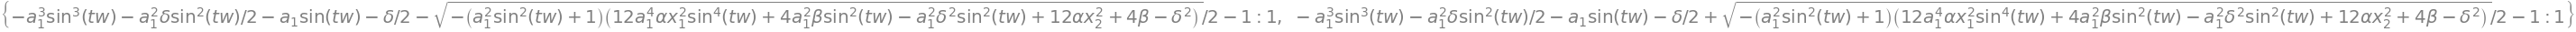

In [214]:
Jac.eigenvals()

### coupling

In [198]:
chi

⎡a₁⋅x₁⋅sin(t⋅w) - x₂⎤
⎢───────────────────⎥
⎢   2    2          ⎥
⎢ a₁ ⋅sin (t⋅w) + 1 ⎥
⎢                   ⎥
⎢a₁⋅y₁⋅sin(t⋅w) - y₂⎥
⎢───────────────────⎥
⎢   2    2          ⎥
⎢ a₁ ⋅sin (t⋅w) + 1 ⎥
⎢                   ⎥
⎢a₁⋅x₁⋅sin(t⋅w) - x₂⎥
⎢───────────────────⎥
⎢   2    2          ⎥
⎢ a₁ ⋅sin (t⋅w) + 1 ⎥
⎢                   ⎥
⎢a₁⋅y₁⋅sin(t⋅w) - y₂⎥
⎢───────────────────⎥
⎢   2    2          ⎥
⎣ a₁ ⋅sin (t⋅w) + 1 ⎦

In [23]:
zeta

⎡                                                      0                      
⎢                                                                             
⎢                                                      0                      
⎢                                                                             
⎢                                a₁⋅w⋅x₁⋅cos(t⋅w) - y₁⋅(-a₀ - a₁⋅sin(t⋅w)) - y
⎢                                                                             
⎢                       3                                                  ⎛  
⎣a₁⋅w⋅y₁⋅cos(t⋅w) + α⋅x₂  + β⋅x₂ + δ⋅y₂ - γ⋅cos(t⋅w) - (-a₀ - a₁⋅sin(t⋅w))⋅⎝- 

                                 ⎤
                                 ⎥
                                 ⎥
                                 ⎥
₂                                ⎥
                                 ⎥
    3                           ⎞⎥
α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(t⋅w)⎠⎦

In [24]:
simplify((chi+zeta))

⎡                                                                   0         
⎢                                                                             
⎢                                                                   0         
⎢                                                                             
⎢                               a₁⋅w⋅x₁⋅cos(t⋅w) + x₁⋅(a₀ + a₁⋅sin(t⋅w)) - x₂ 
⎢                                                                             
⎢                       3                                                     
⎣a₁⋅w⋅y₁⋅cos(t⋅w) + α⋅x₂  + β⋅x₂ + δ⋅y₂ - γ⋅cos(t⋅w) + y₁⋅(a₀ + a₁⋅sin(t⋅w)) -

                                                           ⎤
                                                           ⎥
                                                           ⎥
                                                           ⎥
+ y₁⋅(a₀ + a₁⋅sin(t⋅w)) - y₂                               ⎥
                                                           ⎥
 

In [25]:
simplify((chi+zeta).subs(on_manifold))#.subs([(x2,a*t*x1),(y2,b*t*y1),(z2,c*t*z1)])))

⎡                                                                 0           
⎢                                                                             
⎢                                                                 0           
⎢                                                                             
⎢                                                         a₁⋅w⋅x₁⋅cos(t⋅w)    
⎢                                                                             
⎢         3                          3                                        
⎣- a₀⋅α⋅x₁  + a₀⋅γ⋅cos(t⋅w) - a₁⋅α⋅x₁ ⋅sin(t⋅w) + a₁⋅γ⋅sin(t⋅w)⋅cos(t⋅w) + a₁⋅

                                                      ⎤
                                                      ⎥
                                                      ⎥
                                                      ⎥
                                                      ⎥
                                                      ⎥
                    3          